# Sentiment-Analysis-Consumer-Reviews

**Install Required Libraries**

In [1]:
!pip install wordcloud nltk


**Download and Extract Dataset from UCI**

In [2]:
import os
import urllib.request
import zipfile

# Create directory to store the dataset
dataset_dir = "sentiment_dataset"
os.makedirs(dataset_dir, exist_ok=True)

# Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip"
zip_path = os.path.join(dataset_dir, "sentiment_labelled_sentences.zip")
urllib.request.urlretrieve(url, zip_path)

# Extract the zip file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(dataset_dir)

print("✅ Dataset downloaded and extracted.")


✅ Dataset downloaded and extracted.


**Load Dataset into DataFramet**

In [3]:
import pandas as pd

# Define file paths
base_path = os.path.join(dataset_dir, "sentiment labelled sentences")
files = {
    "amazon": os.path.join(base_path, "amazon_cells_labelled.txt"),
    "imdb": os.path.join(base_path, "imdb_labelled.txt"),
    "yelp": os.path.join(base_path, "yelp_labelled.txt")
}

# Load datasets into a single DataFrame
def load_data(filepath, source):
    df = pd.read_csv(filepath, delimiter='\t', header=None, names=['sentence', 'label'])
    df['source'] = source
    return df

amazon_df = load_data(files["amazon"], "Amazon")
imdb_df = load_data(files["imdb"], "IMDb")
yelp_df = load_data(files["yelp"], "Yelp")

# Combine all into one
data = pd.concat([amazon_df, imdb_df, yelp_df], ignore_index=True)
data.head()


,sentence,label,source
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon


# TEXT CLEANING & PREPROCESSING

**Download NLTK Resources**

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Preprocessing Functions**

In [8]:
import nltk
nltk.download('punkt_tab')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define English stopwords
stop_words = set(stopwords.words('english'))

# Text cleaning function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation/numbers/special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered = [word for word in tokens if word not in stop_words]
    # Join back into string
    return ' '.join(filtered)

# Apply preprocessing to all sentences
data['cleaned'] = data['sentence'].apply(preprocess_text)

# Preview
data[['sentence', 'cleaned']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,sentence,cleaned
0,So there is no way for me to plug it in here i...,way plug us unless go converter
1,"Good case, Excellent value.",good case excellent value
2,Great for the jawbone.,great jawbone
3,Tied to charger for conversations lasting more...,tied charger conversations lasting minutesmajo...
4,The mic is great.,mic great


**Vectorization (TF-IDF)**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['cleaned'])  # Features
y = data['label']                              # Labels


# Model Training & Evaluation

**Train/Test Split**

In [10]:
from sklearn.model_selection import train_test_split

# Use TF-IDF features from earlier step
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['cleaned'])  # Feature matrix
y = data['label']                              # Labels (0 = negative, 1 = positive)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train Naive Bayes Classifier**

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("📊 Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


📊 Naive Bayes Accuracy: 0.8127272727272727

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       291
           1       0.77      0.87      0.81       259

    accuracy                           0.81       550
   macro avg       0.82      0.82      0.81       550
weighted avg       0.82      0.81      0.81       550



**Train Logistic Regression Classifier**

In [12]:
from sklearn.linear_model import LogisticRegression

# Train
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("📊 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


📊 Logistic Regression Accuracy: 0.8018181818181818

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       291
           1       0.79      0.78      0.79       259

    accuracy                           0.80       550
   macro avg       0.80      0.80      0.80       550
weighted avg       0.80      0.80      0.80       550



# Sentiment Distribution + Word Cloud

**Sentiment Distribution by Platform**

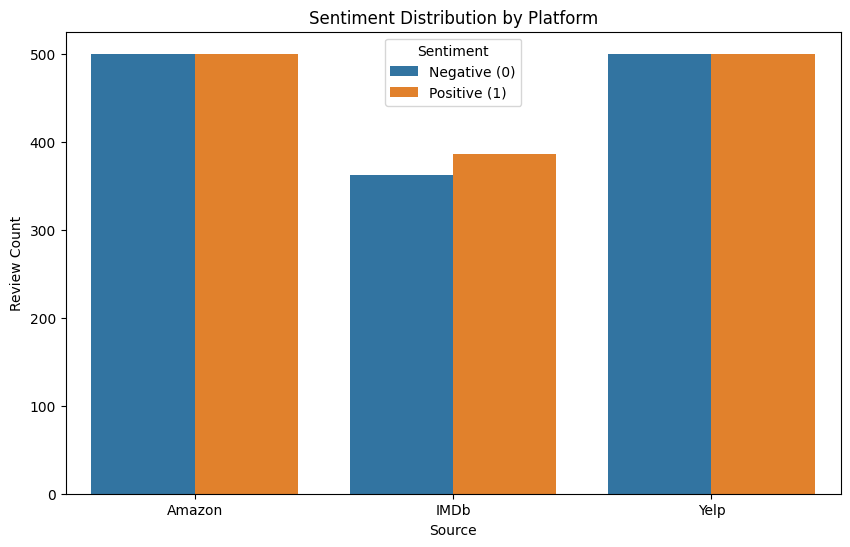

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution by source
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='source', hue='label')
plt.title("Sentiment Distribution by Platform")
plt.xlabel("Source")
plt.ylabel("Review Count")
plt.legend(title='Sentiment', labels=['Negative (0)', 'Positive (1)'])
plt.show()


**Word Cloud for Positive and Negative Reviews**

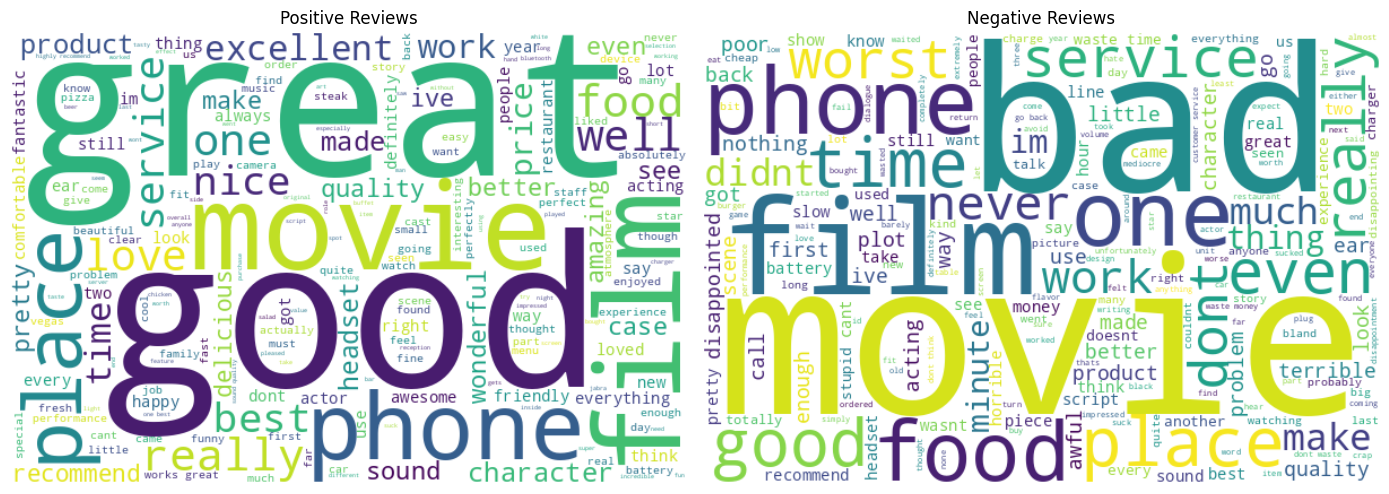

In [14]:
from wordcloud import WordCloud

# Join all cleaned reviews by sentiment
positive_text = " ".join(data[data['label'] == 1]['cleaned'])
negative_text = " ".join(data[data['label'] == 0]['cleaned'])

# Generate word clouds
plt.figure(figsize=(14, 6))

# Positive
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

# Negative
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.tight_layout()
plt.show()


# Plot Confusion Matrices for Both Models

**Plot for Naive Bayes**

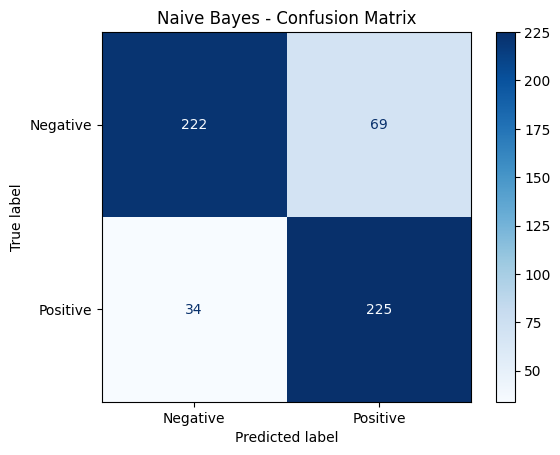

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()


**Plot for Logistic Regression**

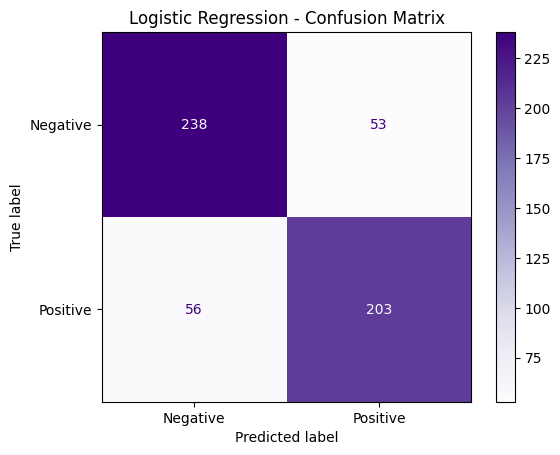

In [16]:
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, display_labels=['Negative', 'Positive'], cmap='Purples')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


# 🎓 Project Summary: Sentiment Analysis of Consumer Reviews

This project explored sentiment classification across Amazon, IMDb, and Yelp review platforms using supervised machine learning. A total of 3,000 labeled sentences (1,000 per platform) were preprocessed using standard NLP techniques such as tokenization, stopword removal, and TF-IDF vectorization.

Two models — Multinomial Naive Bayes and Logistic Regression — were trained and evaluated. The Naive Bayes classifier slightly outperformed Logistic Regression, achieving 81.3% accuracy with balanced precision and recall. Logistic Regression followed closely with 80.2% accuracy.

Visual analysis, including word clouds and sentiment distribution charts, revealed key terms associated with both positive and negative sentiment across platforms. Notably, reviews mentioning service, quality, and price correlated with positive sentiment, while dissatisfaction was often tied to product failures and poor customer experience.

These insights provide a framework for understanding customer feedback at scale and can help businesses refine product strategies and service quality based on real consumer opinions.

